In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('marketing_data.csv',sep=',')

In [3]:
print(df.columns.tolist())

['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [4]:
df.columns = df.columns.str.strip()

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Country','Complain','Dt_Customer','ID'], axis=1, inplace=True)

In [7]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1970,Graduation,Divorced,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,1961,Graduation,Single,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,1958,Graduation,Married,"$67,267.00",0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,1967,Graduation,Together,"$32,474.00",1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,1989,Graduation,Single,"$21,474.00",1,0,0,6,16,24,11,0,34,2,3,1,2,7,1


In [8]:
df['Year_Birth'] = 2022 - df['Year_Birth']

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,52,Graduation,Divorced,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,61,Graduation,Single,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,64,Graduation,Married,"$67,267.00",0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,55,Graduation,Together,"$32,474.00",1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,33,Graduation,Single,"$21,474.00",1,0,0,6,16,24,11,0,34,2,3,1,2,7,1


In [10]:
df['Income'] = df['Income'].str.replace("$","")
df['Income'] = df['Income'].str.replace(",","")
df['Income'] = df['Income'].str.replace(".00","")

In [11]:
df.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
dtype: bool

In [12]:
df_clean = df.copy()

In [13]:
df_clean = df_clean.dropna()

In [14]:
df_clean.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Response               False
dtype: bool

In [15]:
df_clean['Income'] = df_clean['Income'].astype('int64')

In [16]:
df_clean.dtypes

Year_Birth              int64
Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
Response                int64
dtype: object

In [17]:
df_clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,52,Graduation,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,61,Graduation,Single,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,64,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,55,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,33,Graduation,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46,PhD,Divorced,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0
2236,45,2n Cycle,Married,31056,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0
2237,46,Graduation,Divorced,46310,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0
2238,44,Graduation,Married,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0


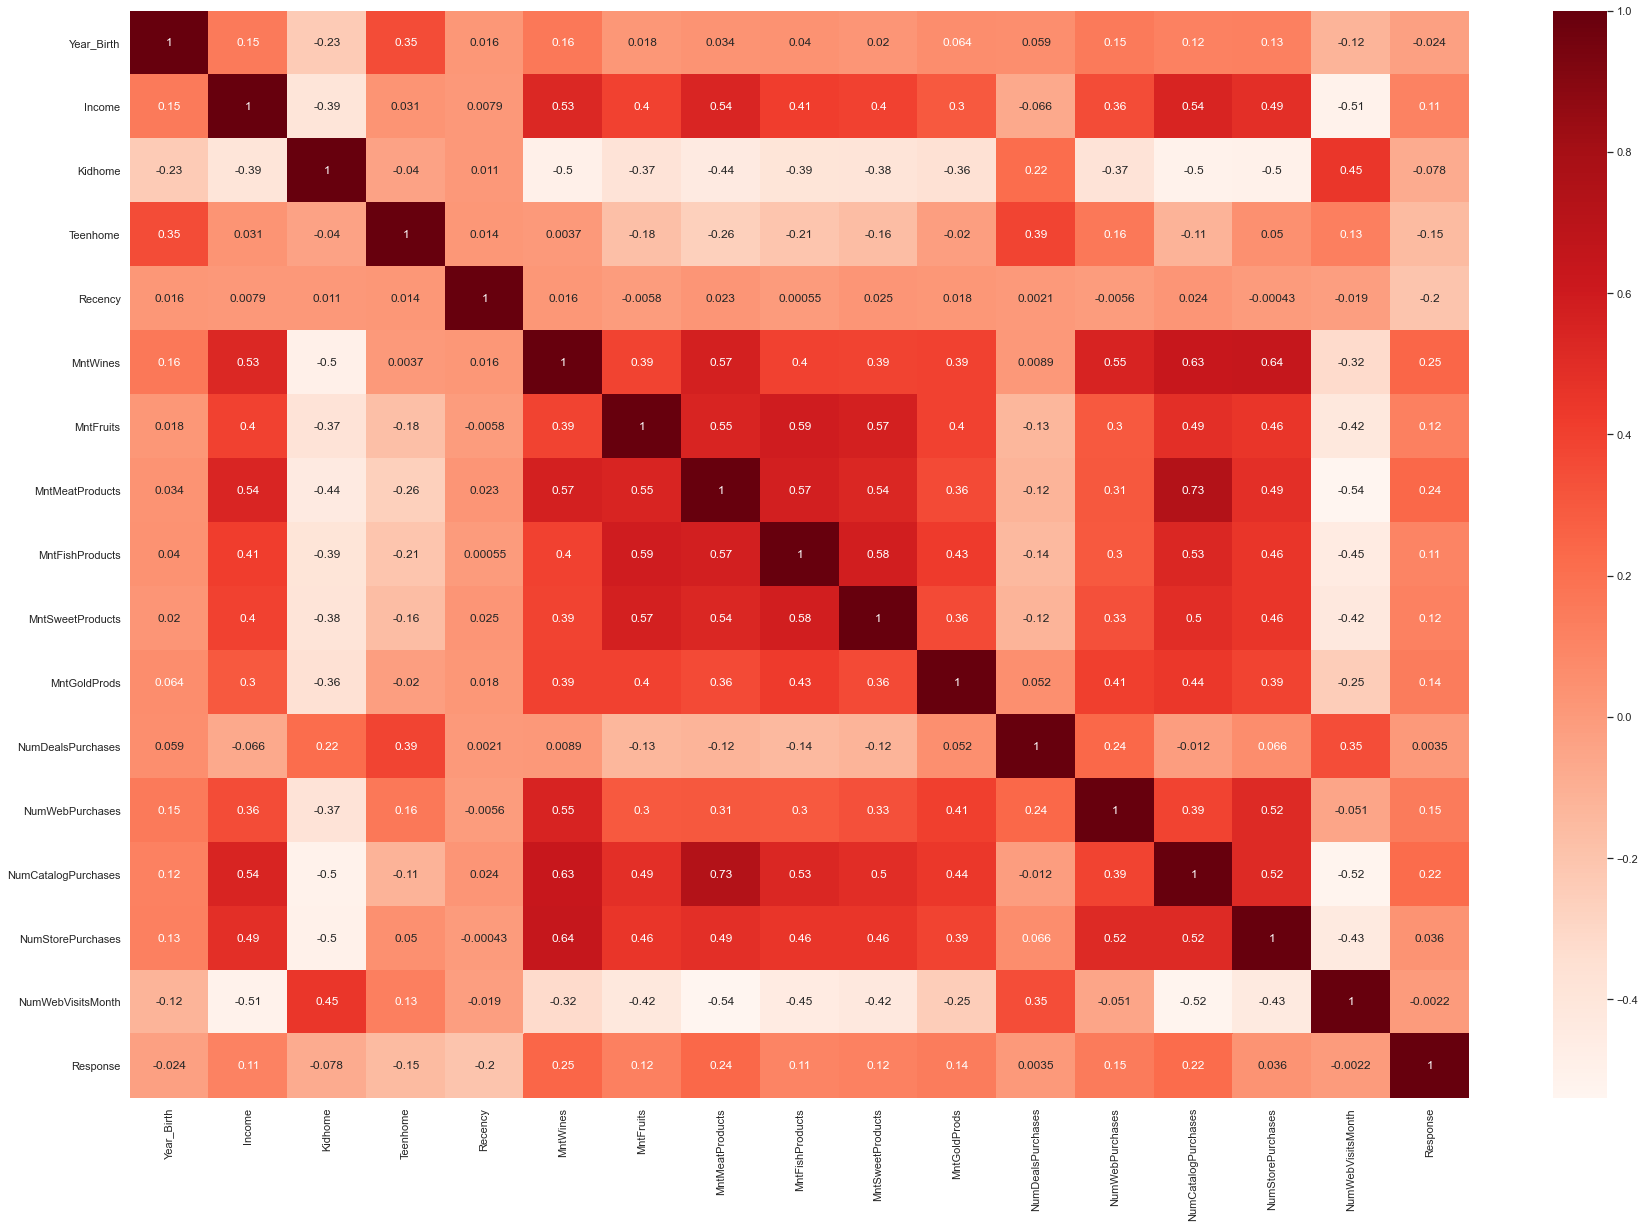

In [18]:
plt.figure(figsize=(30,20))
cor = df_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
 X = df_clean.iloc[:,:-1]

In [20]:
X.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,52,Graduation,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,61,Graduation,Single,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,64,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,55,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,33,Graduation,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7


In [21]:
y = df_clean['Response']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Response, dtype: int64

In [22]:
X_encoded = pd.get_dummies(X, columns=['Education','Marital_Status'])
X_encoded.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,52,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,61,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,1,0,0,0,0,0,0,1,0,0,0
2,64,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,1,0,0,0,0,0,1,0,0,0,0
3,55,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,1,0,0,0,0,0,0,0,1,0,0
4,33,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,0,0,0,0,1,0,0,0


In [23]:
X_encoded.drop(['Marital_Status_YOLO','Marital_Status_Absurd'],axis=1,inplace=True)

In [24]:
X_encoded.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,52,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,1,0,0,0,1,0,0,0,0
1,61,57091,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,1,0,0,0,0,0,1,0,0
2,64,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,1,0,0,0,0,1,0,0,0
3,55,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,1,0,0,0,0,0,0,1,0
4,33,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,0,0,0,1,0,0


In [25]:
y.unique()

array([1, 0], dtype=int64)

In [26]:
sum(y)/len(y)

0.15027075812274368

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42 ,stratify = y )

In [28]:
sum(y_train)/len(y_train)

0.15042117930204574

In [29]:
sum(y_test)/len(y_test)

0.14981949458483754

In [30]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)
clf_xgb.fit(X_train,
            y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.34794
[1]	validation_0-aucpr:0.42041
[2]	validation_0-aucpr:0.44601
[3]	validation_0-aucpr:0.50644
[4]	validation_0-aucpr:0.51418
[5]	validation_0-aucpr:0.52768
[6]	validation_0-aucpr:0.53552
[7]	validation_0-aucpr:0.53867
[8]	validation_0-aucpr:0.56091
[9]	validation_0-aucpr:0.57020
[10]	validation_0-aucpr:0.58400
[11]	validation_0-aucpr:0.59433
[12]	validation_0-aucpr:0.59067
[13]	validation_0-aucpr:0.59057
[14]	validation_0-aucpr:0.58666
[15]	validation_0-aucpr:0.59162
[16]	validation_0-aucpr:0.59314
[17]	validation_0-aucpr:0.59366
[18]	validation_0-aucpr:0.58844
[19]	validation_0-aucpr:0.59183
[20]	validation_0-aucpr:0.60928
[21]	validation_0-aucpr:0.60825
[22]	validation_0-aucpr:0.61240
[23]	validation_0-aucpr:0.60902
[24]	validation_0-aucpr:0.61245
[25]	validation_0-aucpr:0.60659
[26]	validation_0-aucpr:0.60806
[27]	validation_0-aucpr:0.59656
[28]	validation_0-aucpr:0.60098
[29]	validation_0-aucpr:0.60849
[30]	validation_0-aucpr:0.61214
[31]	validation_0-

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-aucpr:0.60790
[42]	validation_0-aucpr:0.60618
[43]	validation_0-aucpr:0.60871
[44]	validation_0-aucpr:0.61673
[45]	validation_0-aucpr:0.61436
[46]	validation_0-aucpr:0.61145


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

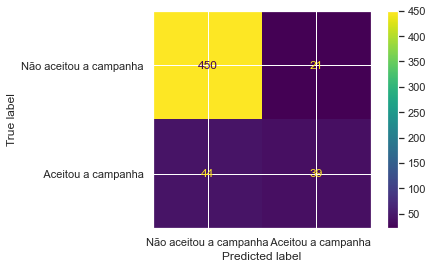

In [31]:
plot_confusion_matrix(clf_xgb,
                    X_test,
                     y_test,
                     display_labels=['Não aceitou a campanha','   Aceitou a campanha'])

In [38]:
#Otimizando os hyperparametros



#Rodada 1 
param_grid = {
    'max_depth':[3, 4, 5],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}
#Resultados obtidos - {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


optimal_params = GridSearchCV(
                    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                               seed=42,
                                               subsample=0.9,
                                               colsample_bytree=0.5),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=0,
                    n_jobs=10,
                    cv=3)




In [39]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test,y_test)],
                  verbose=False)
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
#parametros usados por default no modelo
#{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 6, 'reg_lambda': 1, 'scale_pos_weight': 1}





In [41]:
clf_xgb2 = xgb.XGBClassifier(objective='binary:logistic', 
                             seed=42,
                             gamma=0,
                             learning_rate=0.1,
                             max_depth=4,
                             reg_lambda=10,
                             scale_pos_weight=1,
                             subsample=0.9,
                             colsample_bytree=0.5  
                            )

clf_xgb2.fit(X_train,
            y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.30260
[1]	validation_0-aucpr:0.34354
[2]	validation_0-aucpr:0.33672
[3]	validation_0-aucpr:0.36344
[4]	validation_0-aucpr:0.38515
[5]	validation_0-aucpr:0.39235
[6]	validation_0-aucpr:0.40587
[7]	validation_0-aucpr:0.41606
[8]	validation_0-aucpr:0.41847
[9]	validation_0-aucpr:0.43113
[10]	validation_0-aucpr:0.42982
[11]	validation_0-aucpr:0.42935
[12]	validation_0-aucpr:0.42810
[13]	validation_0-aucpr:0.42772
[14]	validation_0-aucpr:0.43044
[15]	validation_0-aucpr:0.44668
[16]	validation_0-aucpr:0.44185
[17]	validation_0-aucpr:0.44363
[18]	validation_0-aucpr:0.44217
[19]	validation_0-aucpr:0.45155
[20]	validation_0-aucpr:0.45632
[21]	validation_0-aucpr:0.46382
[22]	validation_0-aucpr:0.47067
[23]	validation_0-aucpr:0.46952
[24]	validation_0-aucpr:0.47098
[25]	validation_0-aucpr:0.47857
[26]	validation_0-aucpr:0.48312
[27]	validation_0-aucpr:0.48840
[28]	validation_0-aucpr:0.49216
[29]	validation_0-aucpr:0.49372
[30]	validation_0-aucpr:0.49503
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=10, scale_pos_weight=1,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

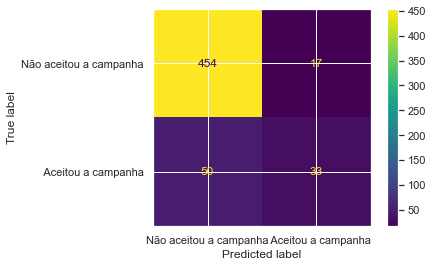

In [49]:
plot_confusion_matrix(clf_xgb2,
                    X_test,
                     y_test,
                     display_labels=['Não aceitou a campanha','   Aceitou a campanha'])